# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
df = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = df
print(type(baby_names))
print(baby_names.shape)

<class 'pandas.core.frame.DataFrame'>
(1016395, 7)


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
print(baby_names.head(10))

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [5]:
baby_names.drop(columns=['Unnamed: 0', 'Id'], inplace=True)

Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [6]:
counts = baby_names['Gender'].value_counts()
print(counts)

F    558846
M    457549
Name: Gender, dtype: int64


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [7]:
name_groups = baby_names.groupby('Name')
name_counts = name_groups['Name'].count()
top_names = name_counts.sort_values(ascending=False).head(10)
print(top_names)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Angel      962
Name: Name, dtype: int64


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

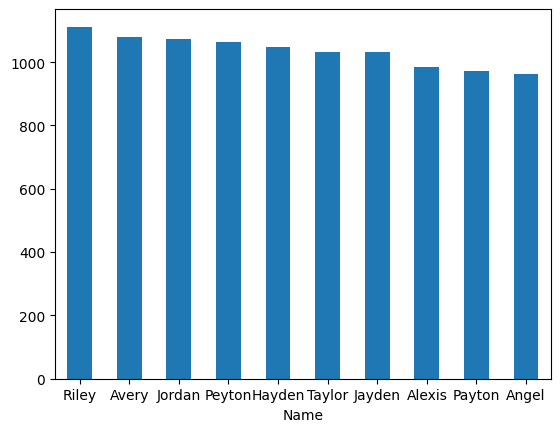

In [8]:
import matplotlib.pyplot as plt
top_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [9]:
num_unique_names = baby_names['Name'].nunique()
print(f'Liczba różnych imion: {num_unique_names}')

Liczba różnych imion: 17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [10]:
import random
name_counts = baby_names['Name'].value_counts()
total_count = name_counts.sum()
name_probs = name_counts / total_count

def name_generator():
    while True:
        yield random.choices(name_probs.index, weights=name_probs.values)[0]

generator = name_generator()
for i in range(5):
    print(next(generator))


Alaina
Carly
Mykel
Robin
Evan


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [11]:
most_common_name = baby_names['Name'].value_counts().index[0]
print(f'Najczęściej występujące imię: {most_common_name}')


Najczęściej występujące imię: Riley


## Część II

Krok 1: Wczytaj dane

In [12]:
filepath = 'lab12_files/ocupation.csv'
df = pd.read_csv(filepath, sep='|')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Krok 2: Podejrzyj pierwsze 25 rekordów

In [13]:
df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [14]:
df.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [15]:
rows, columns = df.shape

print(f'Liczba wierszy: {rows}')
print(f'Liczba kolumn: {columns}')

Liczba wierszy: 943
Liczba kolumn: 5


Krok 5: Wypisz nazwy kolumn

In [16]:
print(df.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


Krok 6: Ile różnych zawodów jest w zbiorze?

In [17]:
column_name = 'occupation'
unique_occupations = df[column_name].unique()
print(f'Liczba różnych zawodów: {len(unique_occupations)}')

Liczba różnych zawodów: 21


Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

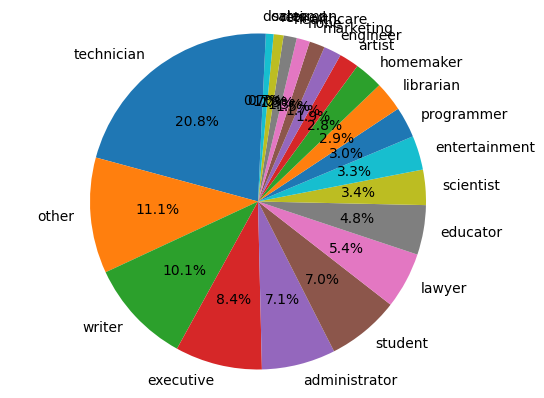

In [18]:
column_name = 'occupation'
unique_occupations = df[column_name].unique()
counts = df[column_name].value_counts()
labels = unique_occupations
sizes = counts
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

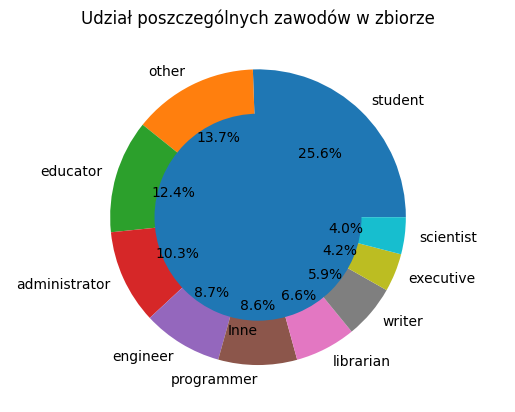

In [19]:
column_name = 'occupation'
counts = df[column_name].value_counts()
top_10_occupations = counts[:10]
percentages = top_10_occupations / len(df) * 100
plt.pie(percentages, labels=top_10_occupations.index, autopct='%1.1f%%')
plt.axis('equal')
other_percentage = 100 - percentages.sum()
plt.pie([other_percentage], labels=['Inne'], radius=0.7, startangle=90)
plt.title('Udział poszczególnych zawodów w zbiorze')
plt.show()

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

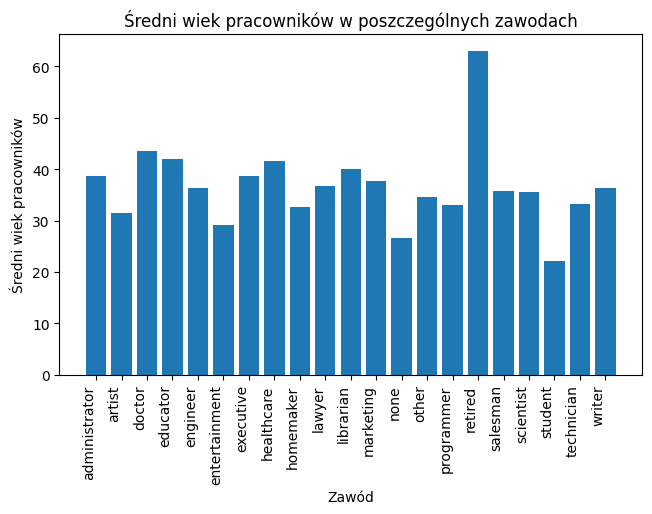

In [20]:
import matplotlib.pyplot as plt
column_name = 'occupation'
plot_df = df.groupby(column_name)['age'].mean().reset_index()
plt.rcParams['figure.facecolor'] = 'white'
plt.bar(plot_df[column_name], plot_df['age'])
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.xlabel('Zawód')
plt.ylabel('Średni wiek pracowników')
plt.title('Średni wiek pracowników w poszczególnych zawodach')
plt.show()

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.